<a href="https://www.kaggle.com/code/saragamilmohamed/mall-customer-k-means-and-data-visualization-ipynb?scriptVersionId=194466297" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Installing the Libraries

In [14]:
pip install dabl
























   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.3/558.3 kB 12.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 26.1 MB/s eta 0:00:00


  Attempting uninstall: matplotlib

    Found existing installation: matplotlib 3.7.1

    Uninstalling matplotlib-3.7.1:

      Successfully uninstalled matplotlib-3.7.1



In [15]:
# for basic mathematics operation
import numpy as np
# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import dabl


### Reading the Dataset

In [3]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')
data.shape

(200, 5)

In [4]:
# lets check the head of the data
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# lets check the tail of the data
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


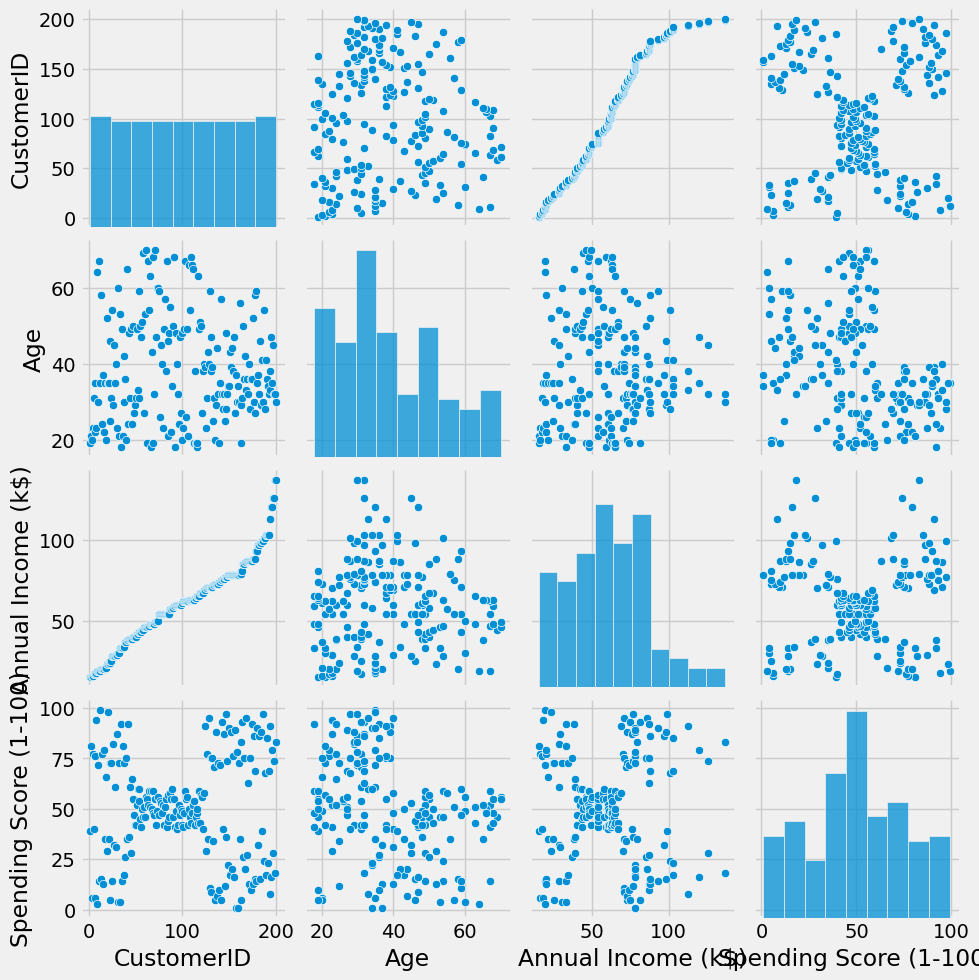

In [6]:
# lets get the pairplot for the data
sns.pairplot(data)
plt.show()

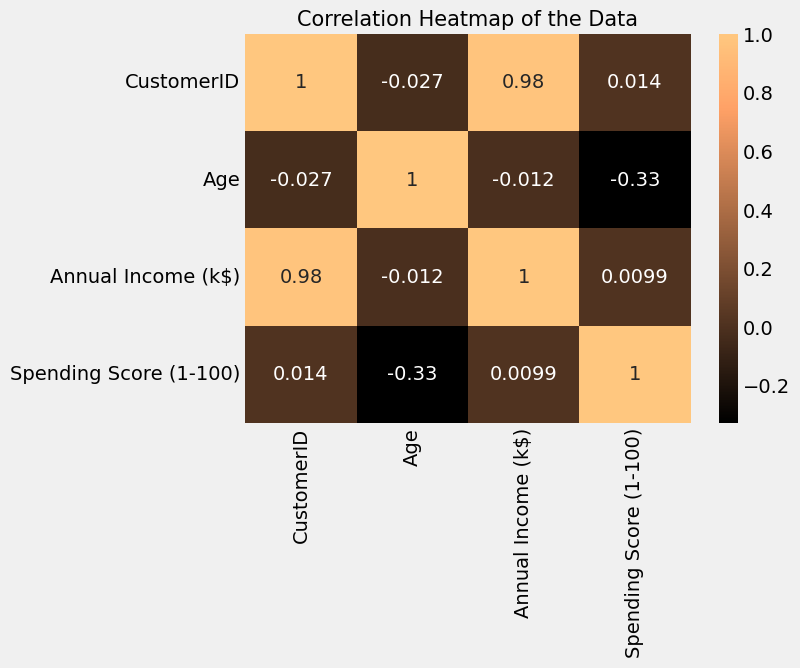

In [7]:
# lets check the Correlation Heat Map of the Data
sns.heatmap(data.select_dtypes(include=('number')).corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

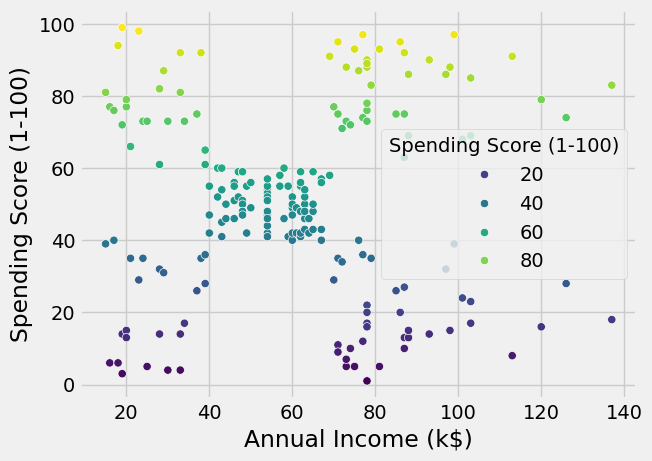

In [13]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending Score (1-100)', palette='viridis')

Target looks like regression


/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

  medians = X_new.groupby(col)[target_col].median()


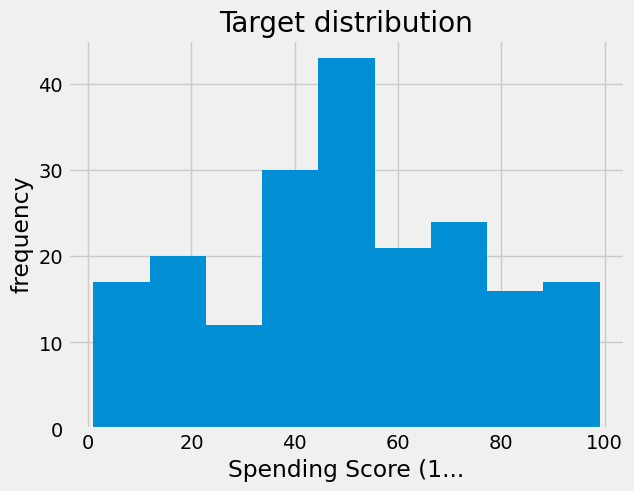

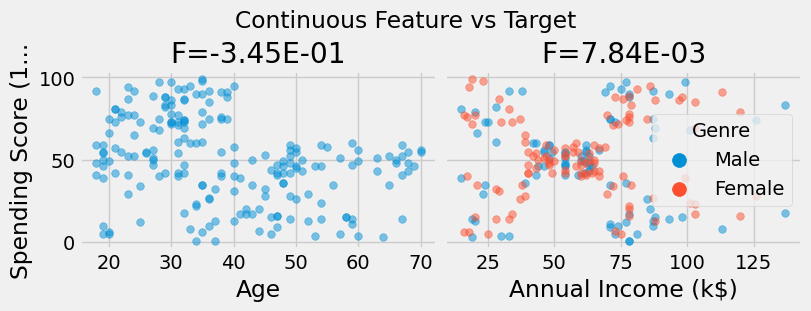

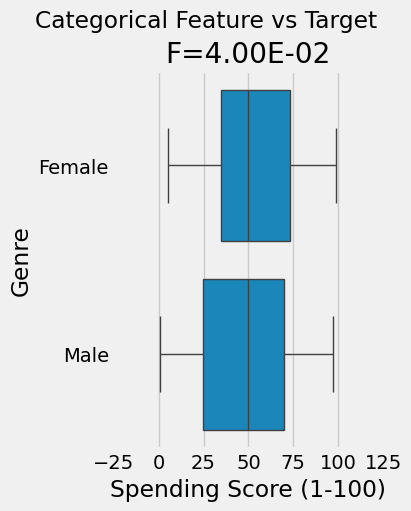

In [16]:
# Function to handle the AttributeError
def plot_with_fallback(data, target_col):
    try:
        dabl.plot(data, target_col=target_col)
    except AttributeError as e:
        if "legendHandles" in str(e):
            print("AttributeError encountered. Trying to handle the legend issue.")
            # Custom code to handle the error
            # You may want to modify the dabl library directly as a temporary fix
        else:
            raise

# Plot with fallback for legendHandles AttributeError
plot_with_fallback(data, target_col='Spending Score (1-100)')

Target looks like regression


/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

  medians = X_new.groupby(col)[target_col].median()


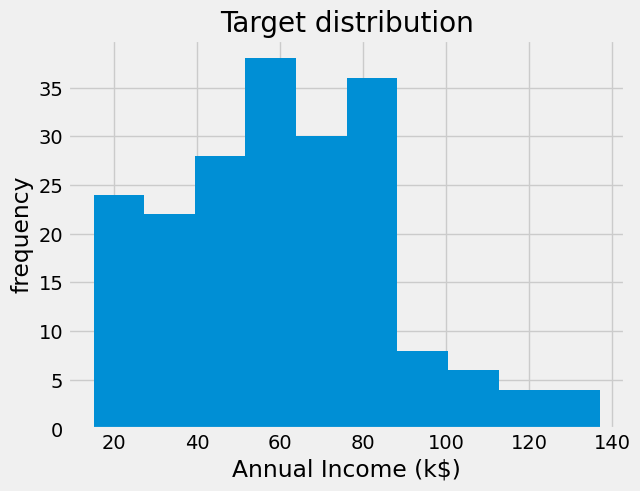

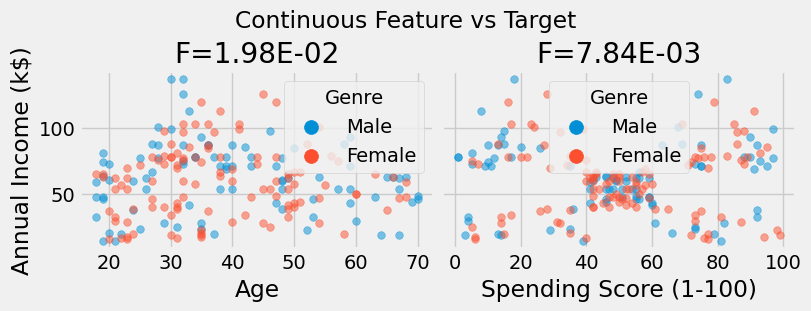

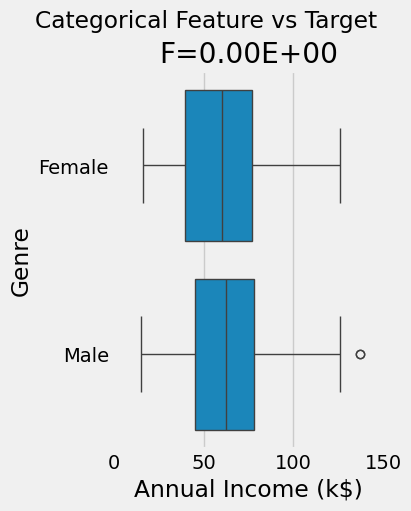

In [17]:
# Function to handle the AttributeError
def plot_with_fallback(data, target_col):
    try:
        dabl.plot(data, target_col=target_col)
    except AttributeError as e:
        if "legendHandles" in str(e):
            print("AttributeError encountered. Trying to handle the legend issue.")
            # Custom code to handle the error
            # You may want to modify the dabl library directly as a temporary fix
        else:
            raise

# Plot with fallback for legendHandles AttributeError
plot_with_fallback(data, target_col='Annual Income (k$)')

## Descriptive Statistics

In [22]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)'>

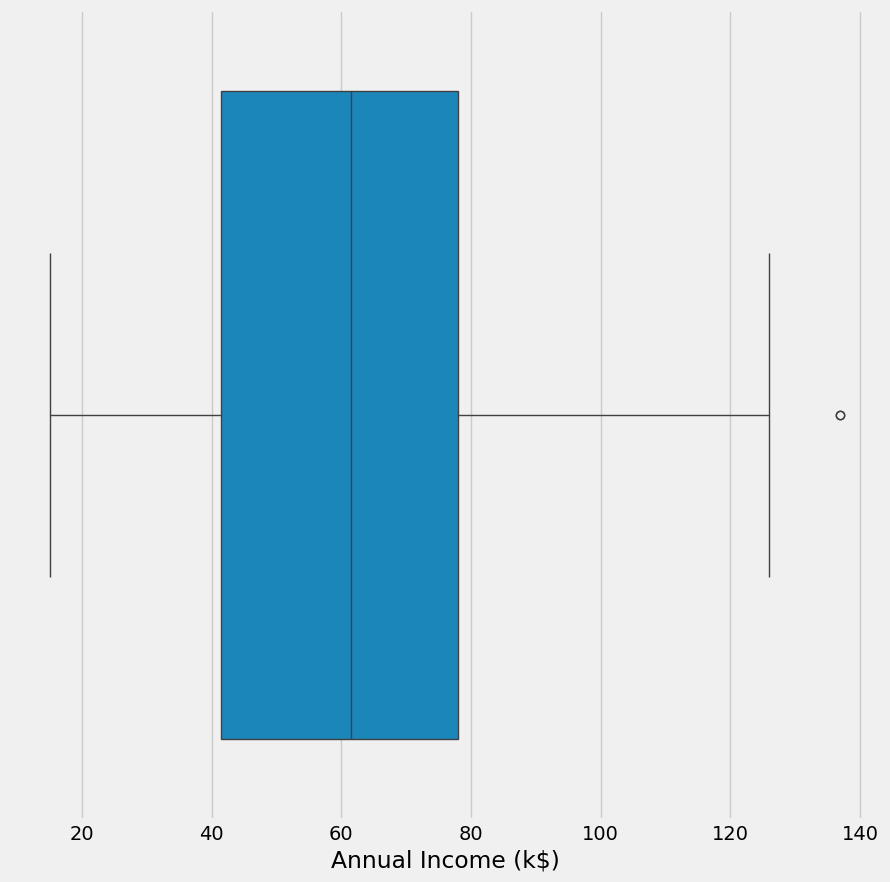

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['Annual Income (k$)'])

In [24]:
data[data['Annual Income (k$)'] > 130] = data['Annual Income (k$)'].median()

<ipython-input-24-e1b301036339>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '61.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

  data[data['Annual Income (k$)'] > 130] = data['Annual Income (k$)'].median()


In [25]:
# describing the categorical data
data.describe(include = 'object')

,Genre
count,200
unique,3
top,Female
freq,112


In [26]:
# checking if there is any NULL data
data.isnull().any()

,0
CustomerID,False
Genre,False
Age,False
Annual Income (k$),False
Spending Score (1-100),False


## Data Visualization

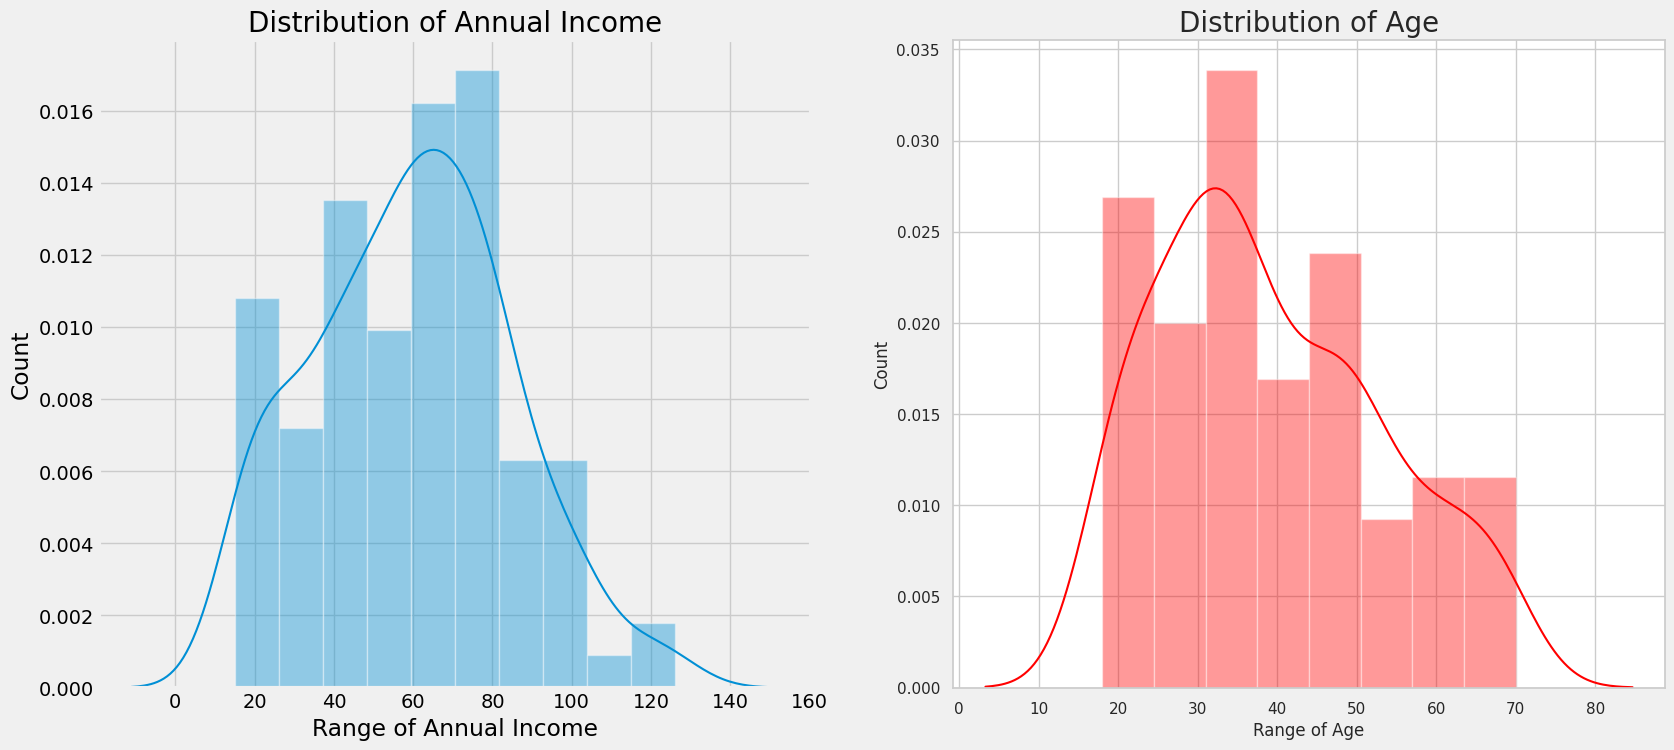

In [27]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [36]:

data = data[data['Genre'] != 61.5]

In [37]:
data['Genre'].value_counts()

,count
Genre,
Female,112
Male,86


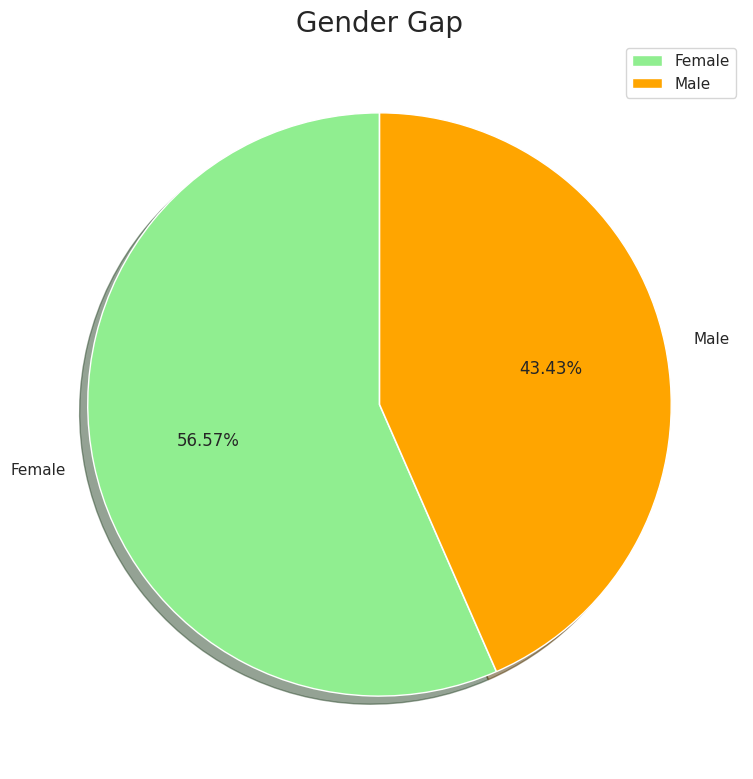

In [38]:
labels = ['Female', 'Male']
size = data['Genre'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

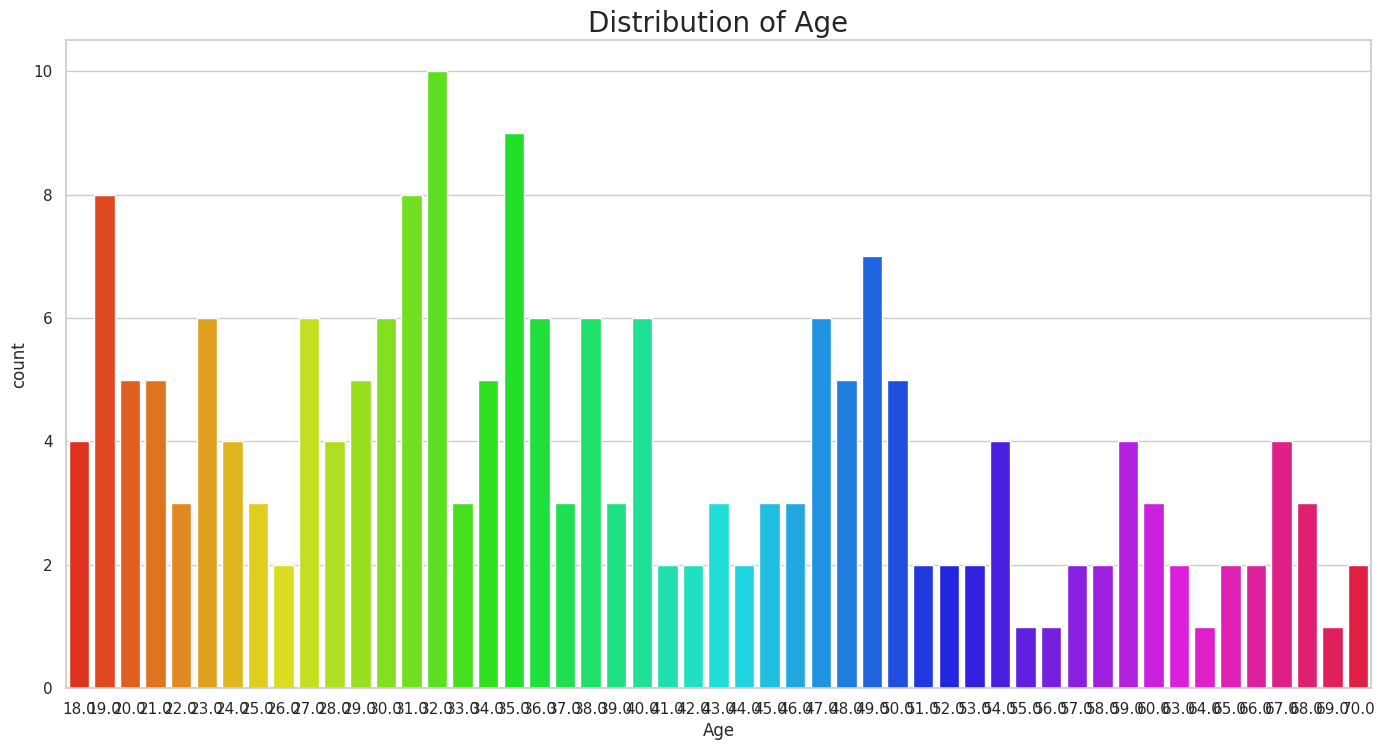

In [39]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x=data['Age'],palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

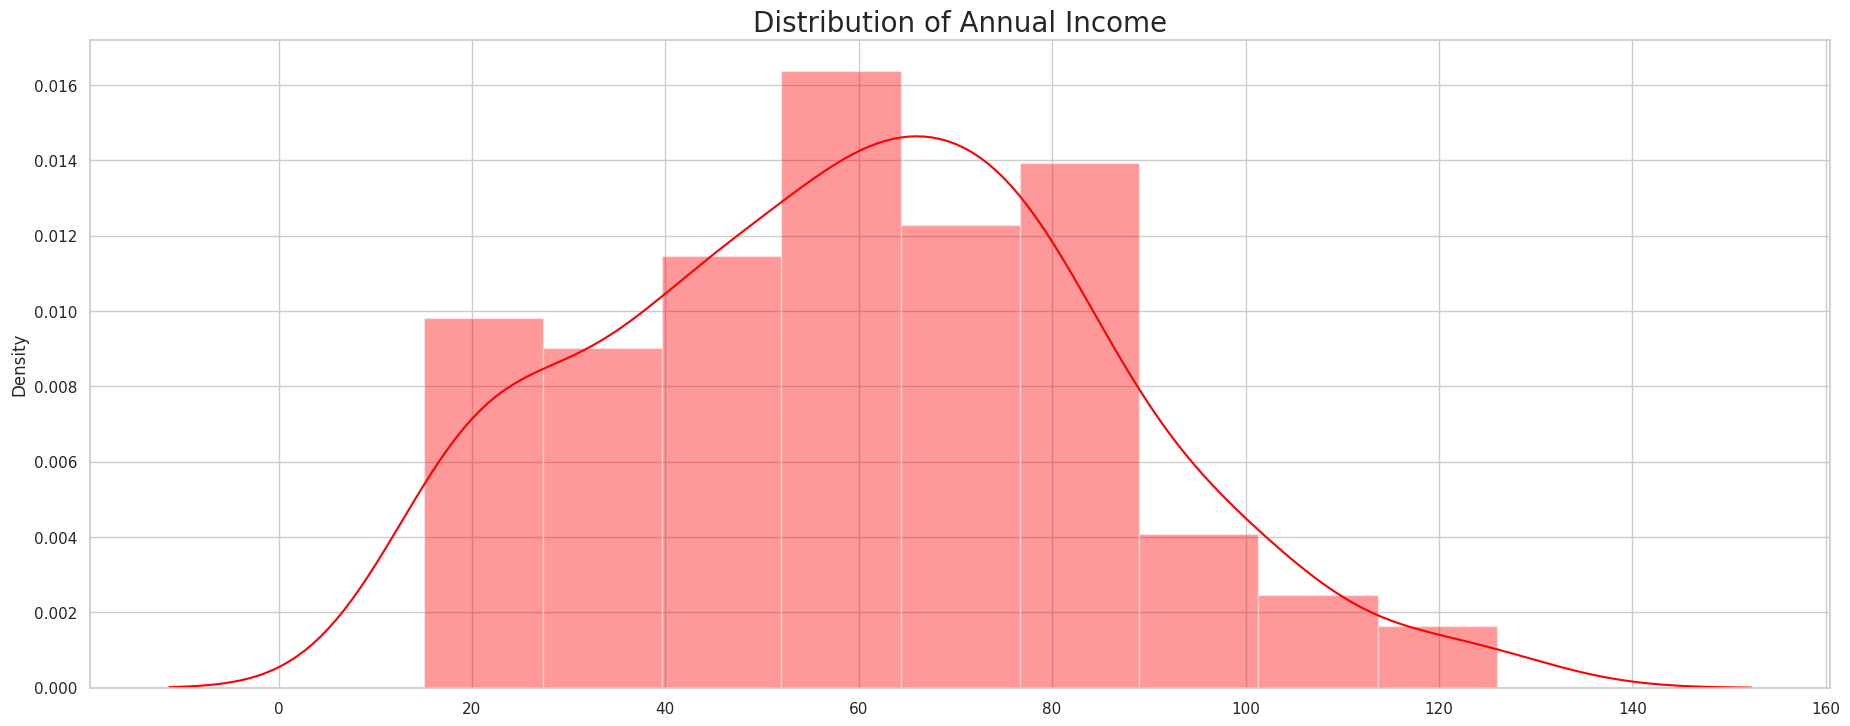

In [40]:
# lets check the sitribution of Annual Income
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(x=data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

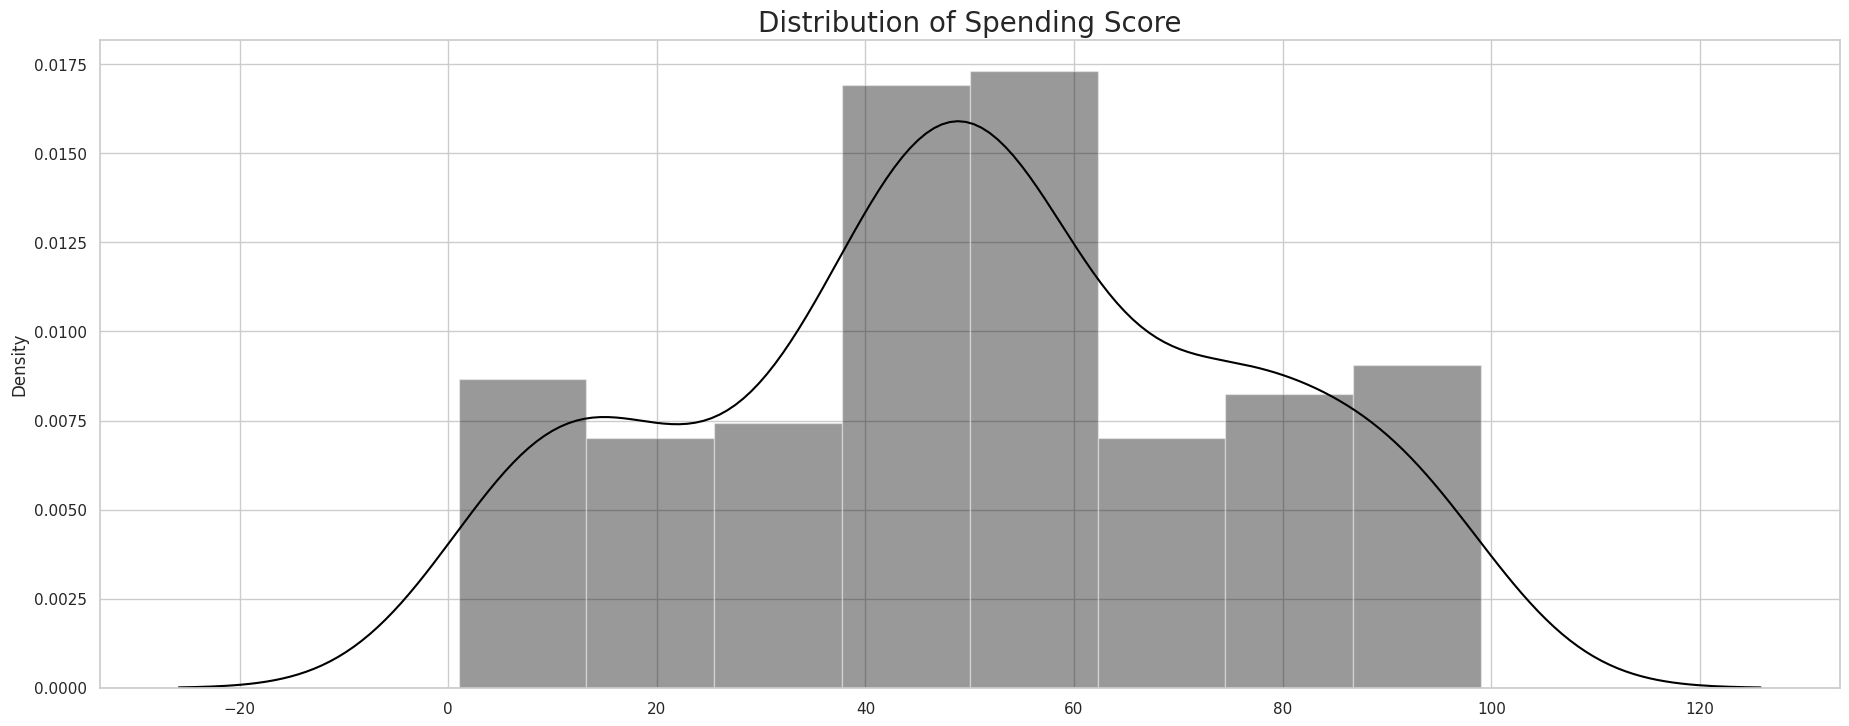

In [41]:
# lets check the distribution of Spending Score
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(x=data['Spending Score (1-100)'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()


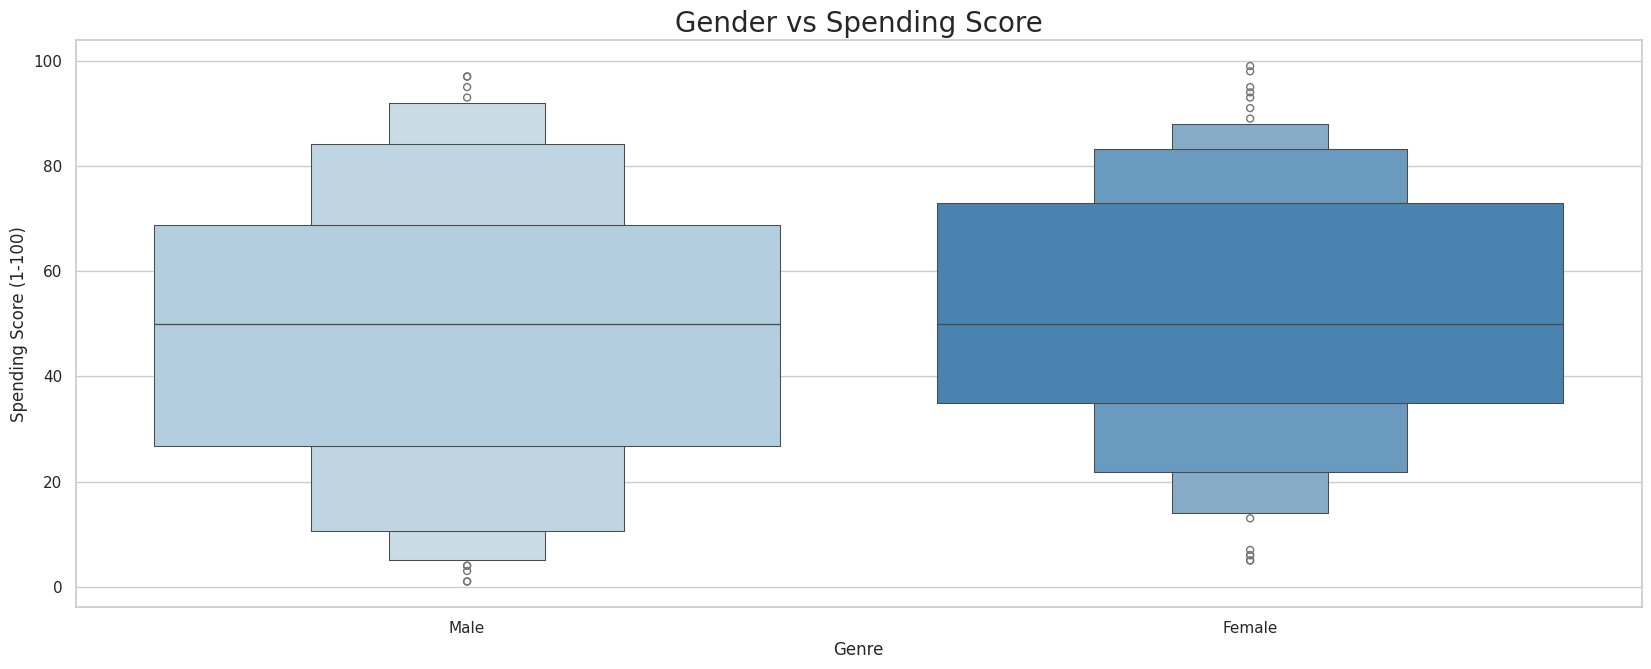

In [43]:
#  Gender vs Spendscore
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(x=data['Genre'], y=data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()


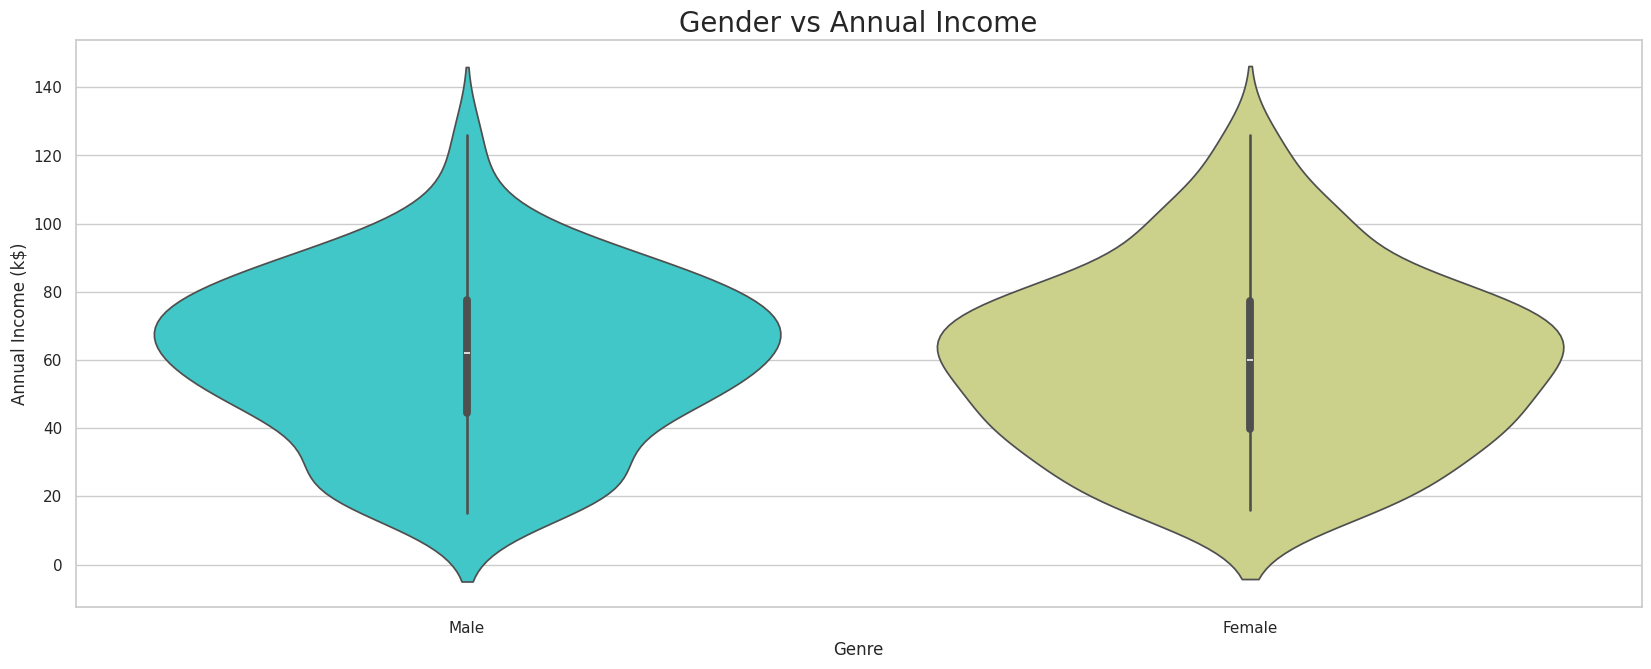

In [44]:
## Gender vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(x=data['Genre'], y=data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

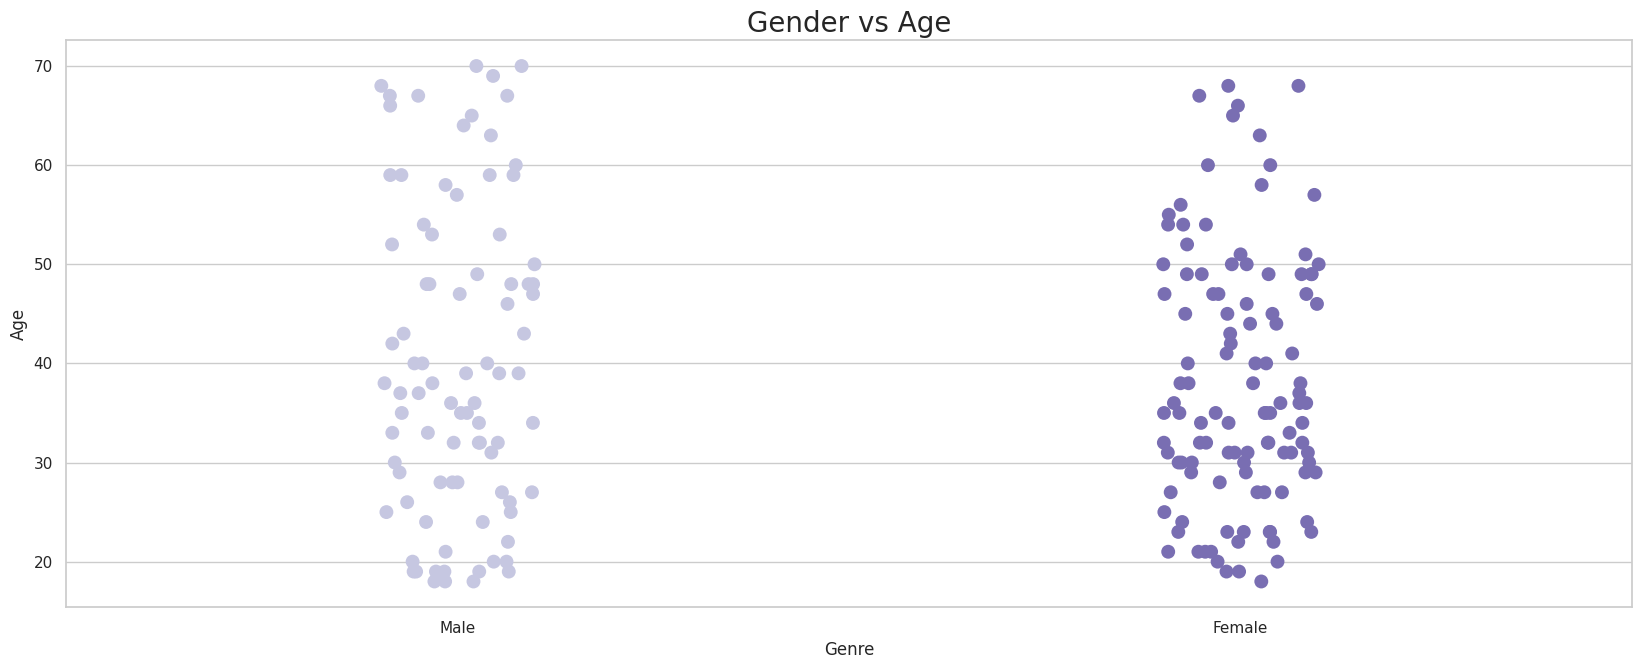

In [46]:
# Gender vs Age
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(x=data['Genre'], y=data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

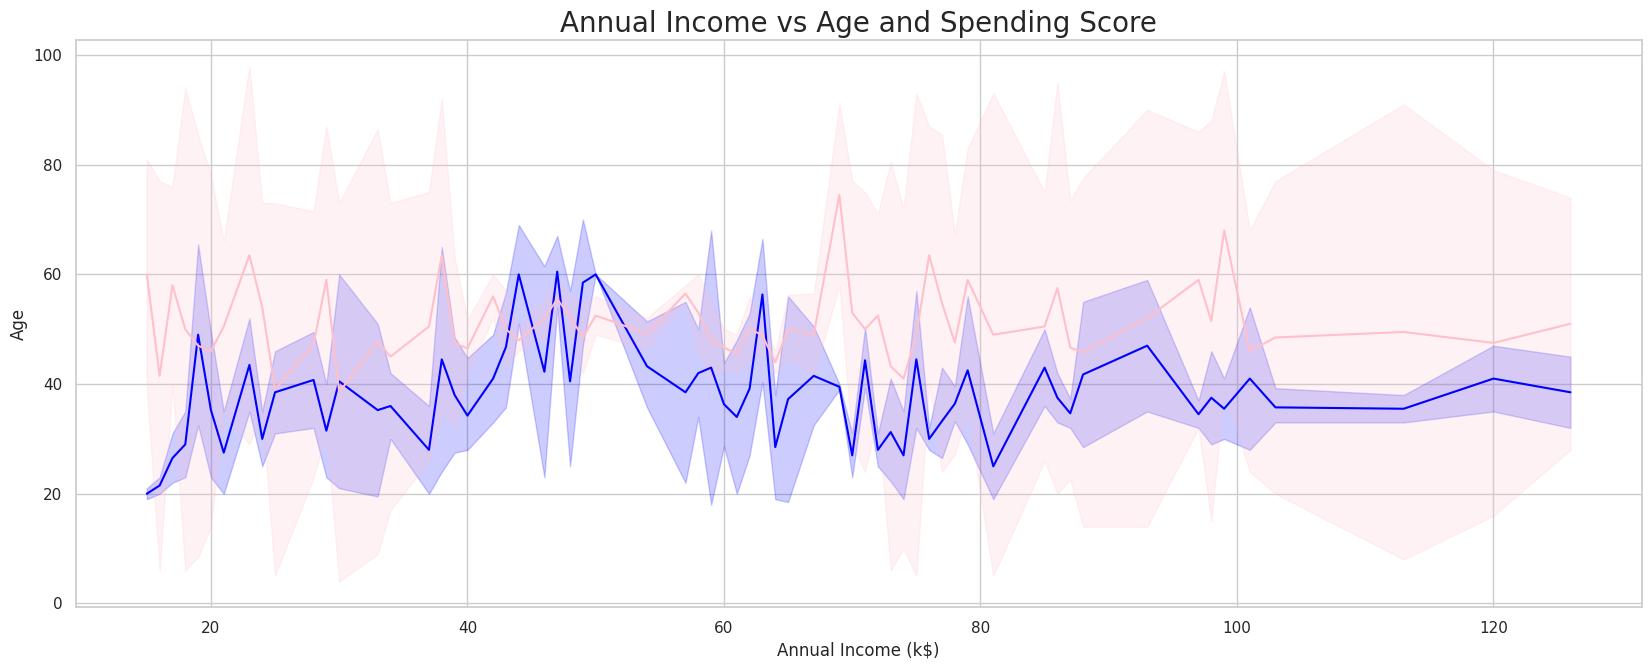

In [47]:
# Annual Income vs Age and Spending Score
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x=x, y=y, color = 'blue')
sns.lineplot(x=x, y=z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()


## Clustering Analysis

In [48]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# let's check the shape of x
print(x.shape)

(198, 2)


In [49]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income


,0,1
0,39.0,15.0
1,81.0,15.0
2,6.0,16.0
3,77.0,16.0
4,40.0,17.0


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

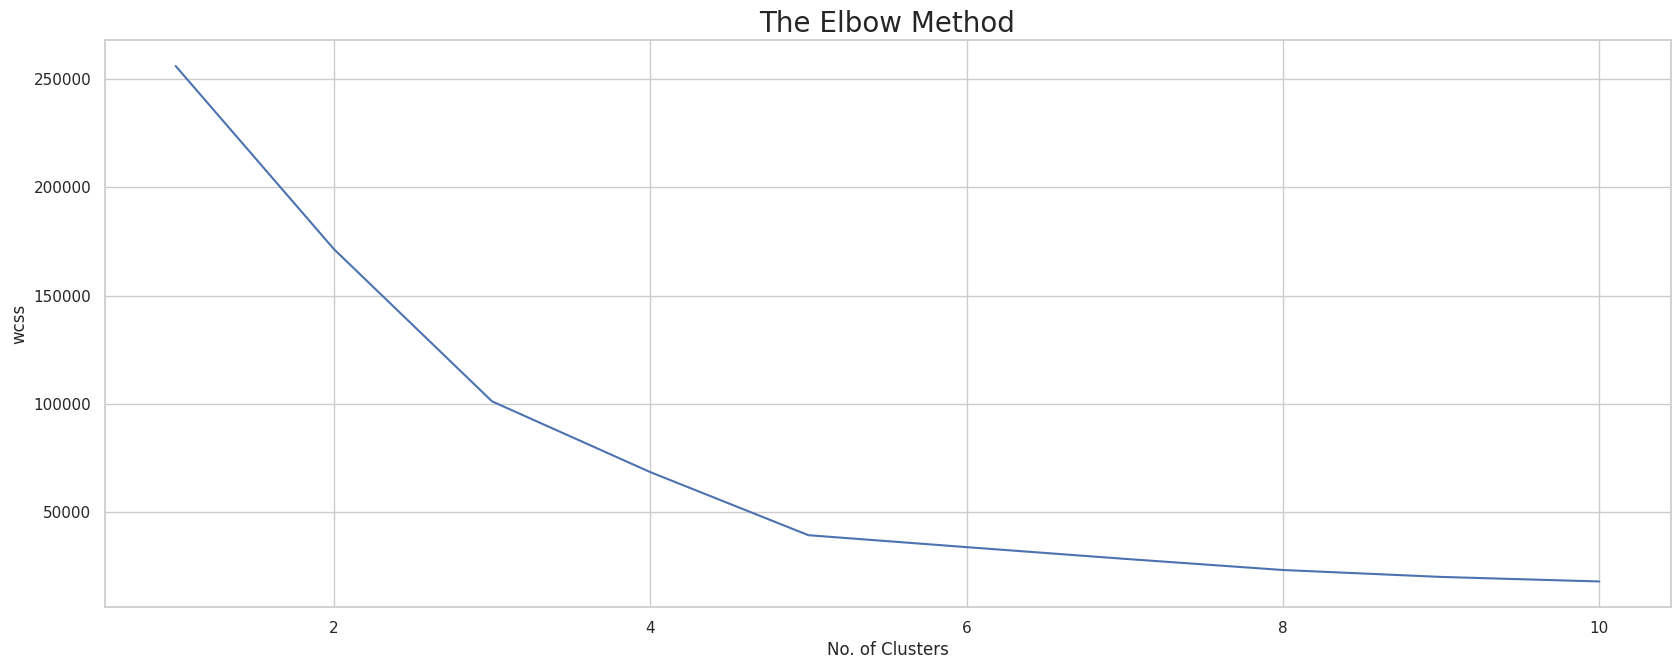

In [50]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Visualizaing the Clusters**

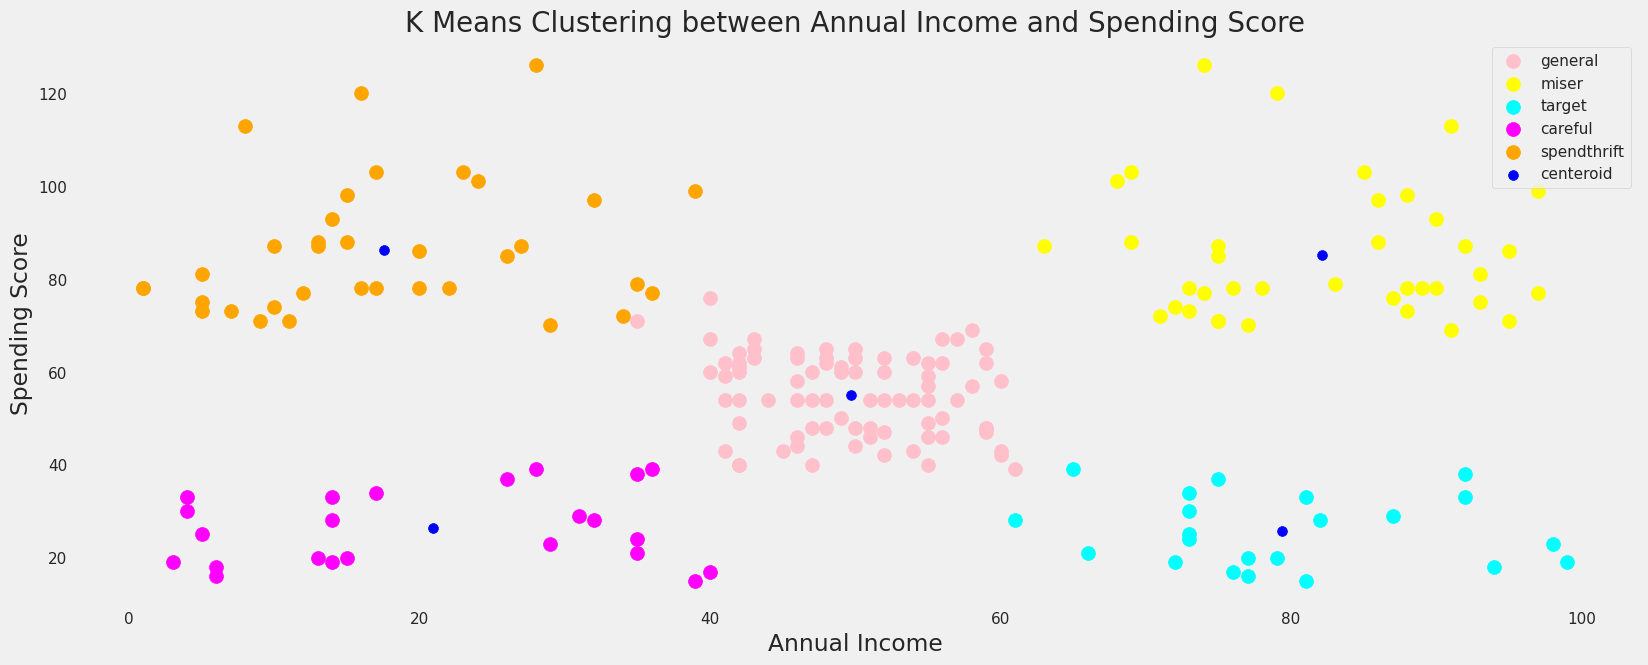

In [51]:
# lets visualize these clusters
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'careful')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'spendthrift')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


### Clustering between Age and Spending Score

In [73]:

import warnings
warnings.filterwarnings('ignore')


x = data.loc[:, ['Age','Spending Score (1-100)']].values


print(x.shape)

(198, 2)


In [74]:

x_data  = pd.DataFrame(x)
x_data.head()



,0,1
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0


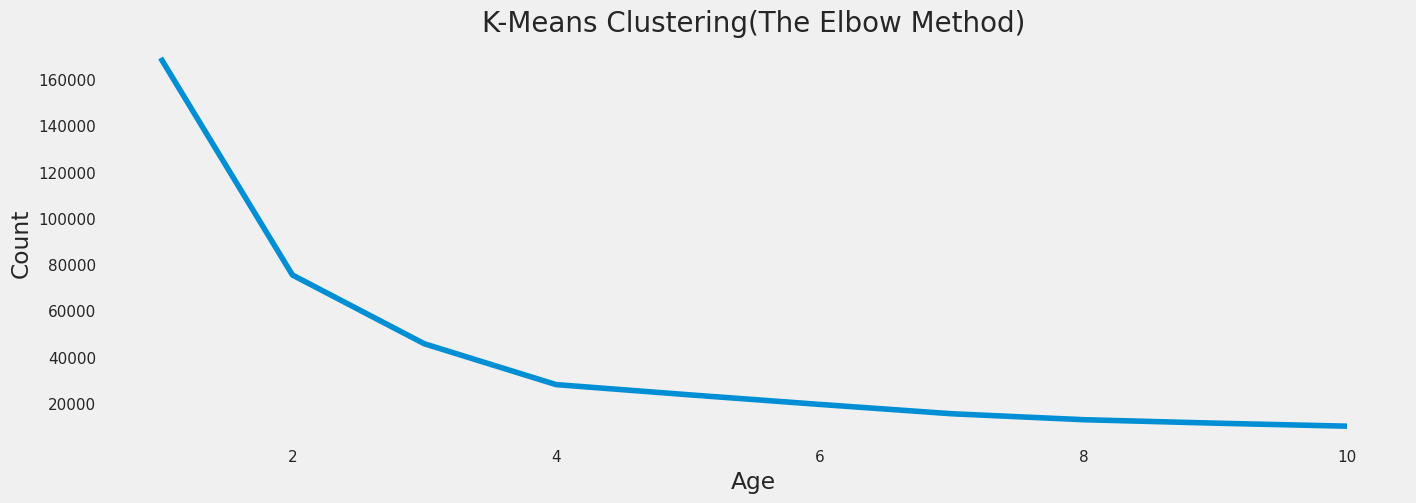

In [75]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

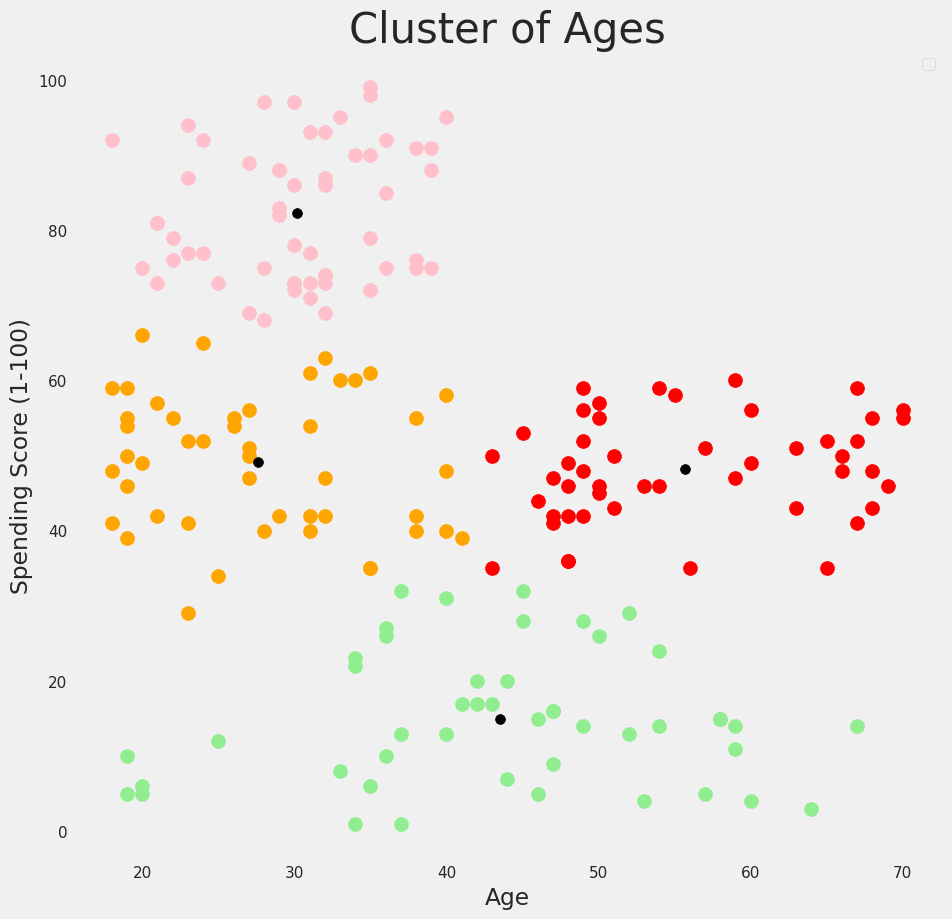

In [77]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange',)
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen',)
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()
